In [46]:
print("Hello! jupyter notebook!")

Hello! jupyter notebook!


#### 实验简述:

通过**简单的线性回归来**处理糖尿病相关数据, 通过 BMI 指数预测糖尿病的疾病程度

> 除了简单线性回归, 还有单变量线性回归和多元线性回归

---


1. 简单打印数据集

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# model_selection 用于将数据进训练和测试集
from sklearn import datasets, linear_model, model_selection


# 内置的糖尿病数据集(diabetes dataset)
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
# 包含 
# age: 年龄
# bmi: 体制指数 (body mass index)
# bp: 平均血压
# s1 tc: T-Cells (一种类型的白细胞)

# 当设置 retrun_X_y 为 true 时
# X 为数据矩阵, y 为回归目标
# ? y 回归目标, 共有 442 个
X,y = datasets.load_diabetes(return_X_y=True)

# 矩阵形状 (442 行, 10 列)
print(X.shape)

# 打印矩阵的第一行元素
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


根据[Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)的描述, 回归目标是是基线后一年疾病进展的定量指标

回归目标原文:
Column 11 is a quantitative(量化的) measure(测量) of disease progression(进展) one year after baseline

> TODO 去学习机器学习的基线含义

baseline: 字面意思就是基准线，拿某一个模型做baseline的意思是以这个模型做参考标准，来评估新的模型的效果好坏

2. 选择与操作数据

In [48]:
# 选择所有行的第3列数据, BMI
X = X[:, 2]

# 血糖
# X = X[:, 9]

# 将数据重新排列为 2 维数组, 为绘制图形做准备
# reshape((行数, 列数)), 如果其中一个参数为 -1, 那么数组维度将会自动计算
X = X.reshape((-1, 1))
print(X)

[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.02452876]
 [-0.01806

3. 测试集与训练集

In [49]:

# 将数据 (X) 和 回归目标 (y) 拆分进测试和训练集
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

4. 训练模型

> `model.fit()` 函数经常出现在机器学习库中, 比如 TensorFlow

In [50]:
# 加载线性回归模型
model = linear_model.LinearRegression()
# 训练模型
model.fit(X_train, y_train)

LinearRegression()

5. 使用测试数据来预测

In [51]:
# 获取用于测试的预测集
y_pred = model.predict(X_test)

6. 展示数据

身体质量指数 (BMI)

$BMI=体重÷身高^2$

| 人体胖瘦程度 |    消瘦    |    正常值    |   超重   |
| :----------: | :--------: | :----------: | :------: |
|   BMI 数值   | <18.5kg/m² | 18.5-24kg/m² | >24kg/m² |



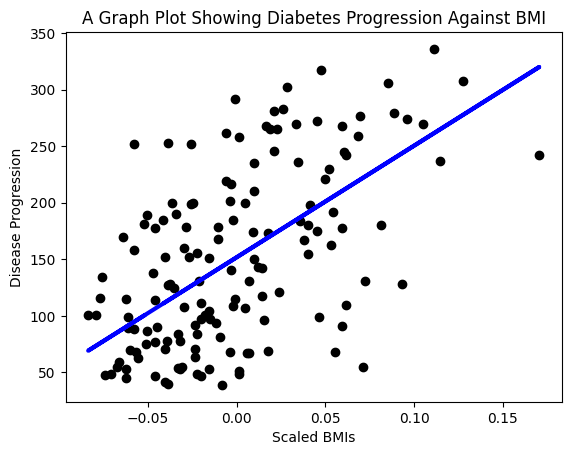

In [52]:
plt.scatter(X_test, y_test,  color='black') # 绘制散点图
plt.plot(X_test, y_pred, color='blue', linewidth=3) # 绘制预测

plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression') # 疾病程度

plt.title('A Graph Plot Showing Diabetes Progression Against BMI') # 糖尿病程度与 BMI 的关系
plt.show()